In [11]:
from pathlib import Path
import json

In [12]:
from main import MyPlot

In [13]:
# read data from the data folder
data_folder = Path("__file__").parent / "data"
data_file_name = "data.json"
with open(data_folder / data_file_name, "r") as f:
    json_data = f.read()
# Parse the JSON data
data = json.loads(json_data)

In [14]:
# print keys of the data
print(data.keys())

dict_keys(['HPyBF4_CP', 'HPyBF4_CT', 'HPyBr_CP', 'HPyBr_CT', 'OPyBr_CP', 'BMIMBr_CP_CT', 'BMIMBr_CT', 'DES117_CP'])


# constant pressure

In [15]:
obj = MyPlot()

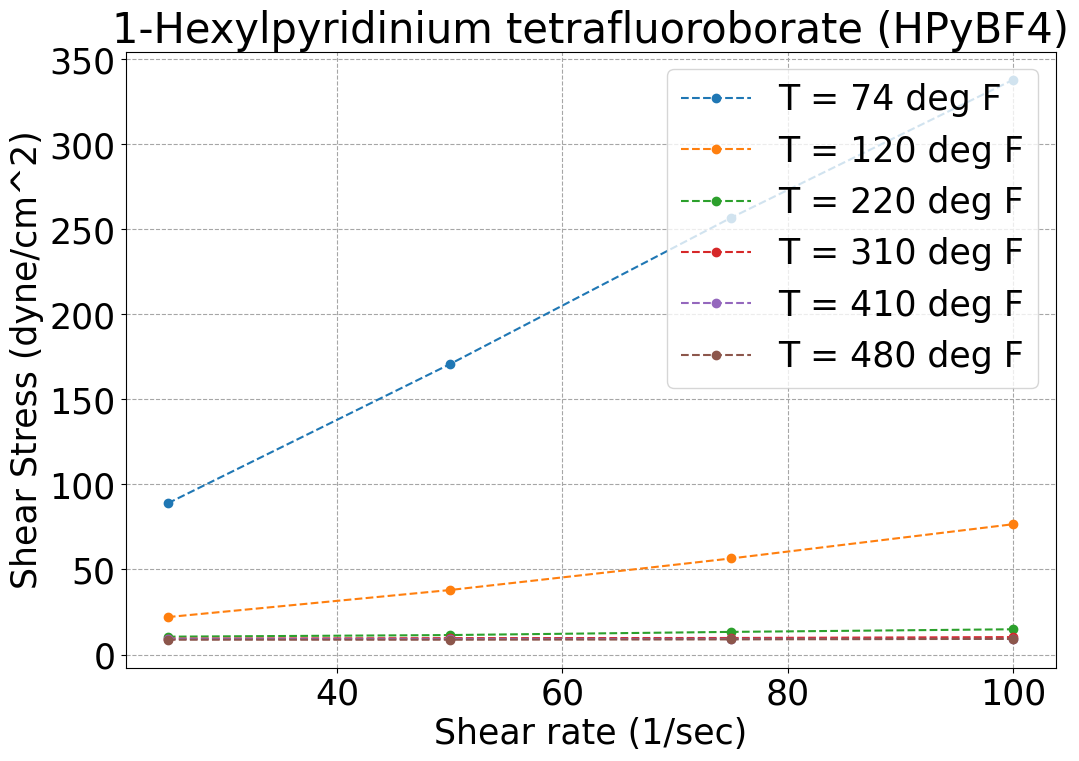

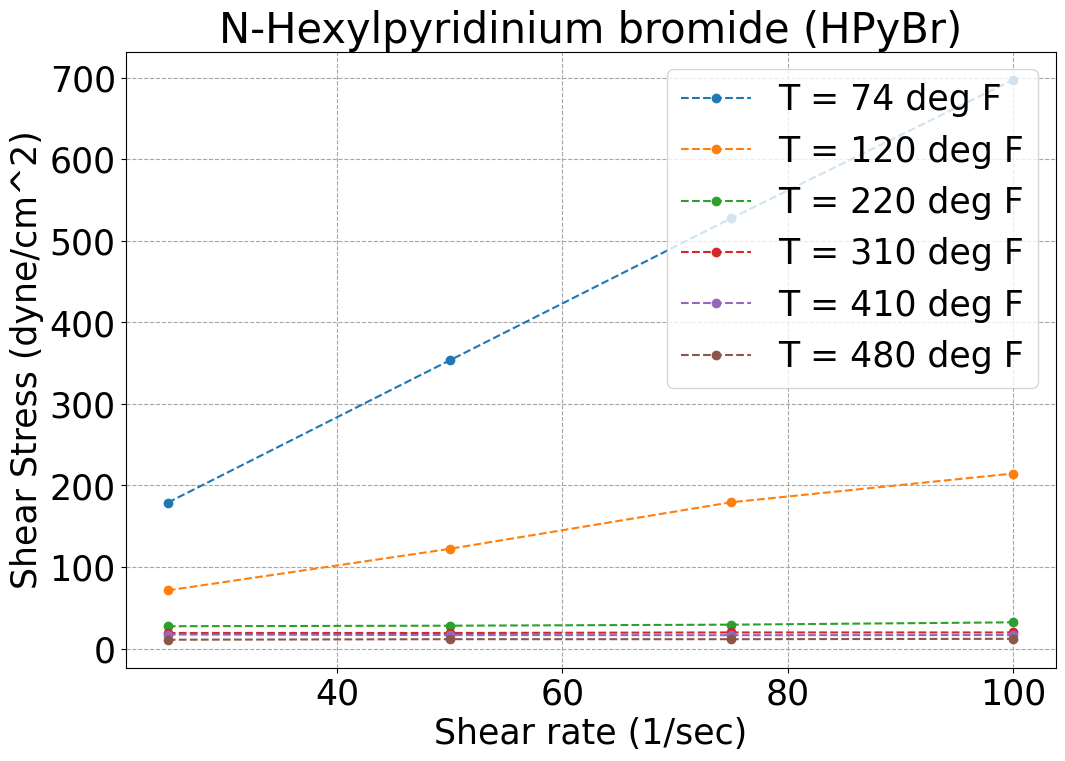

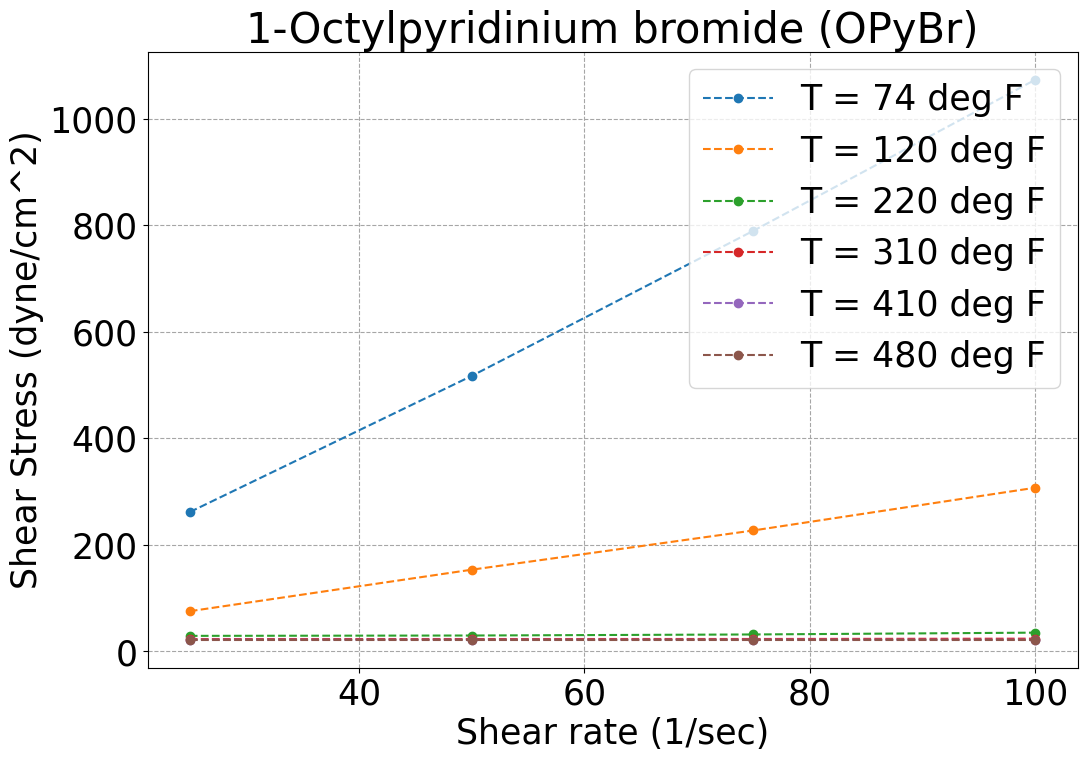

In [16]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    
    'HPyBr_CP',
    # 'HPyBr_CT',
    
    'OPyBr_CP',
    
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'

    # 'DES117_CP'
]

mapping_dict = {
    "HPyBF4_CP": "1-Hexylpyridinium tetrafluoroborate (HPyBF4)",
    "HPyBr_CP": "N-Hexylpyridinium bromide (HPyBr)",
    "OPyBr_CP": "1-Octylpyridinium bromide (OPyBr)",
    "HPyBF4_CT": "1-Hexylpyridinium tetrafluoroborate (HPyBF4)",
    "HPyBr_CT": "N-Hexylpyridinium bromide (HPyBr)",
    "BMIMBr_CP_CT": "1-Butyl-3-methylimidazolium bromide (BMIMBr)",
    "BMIMBr_CT": "1-Butyl-3-methylimidazolium bromide (BMIMBr)",
    "DES117_CP": "ChCl-MgCl2(6H2O) (DES117)"
}

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='SS',
    legend_units='deg F',
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Shear Stress (dyne/cm^2)',
    maping_dict=mapping_dict,
    font_size=25,
    axis_font_size=25
)

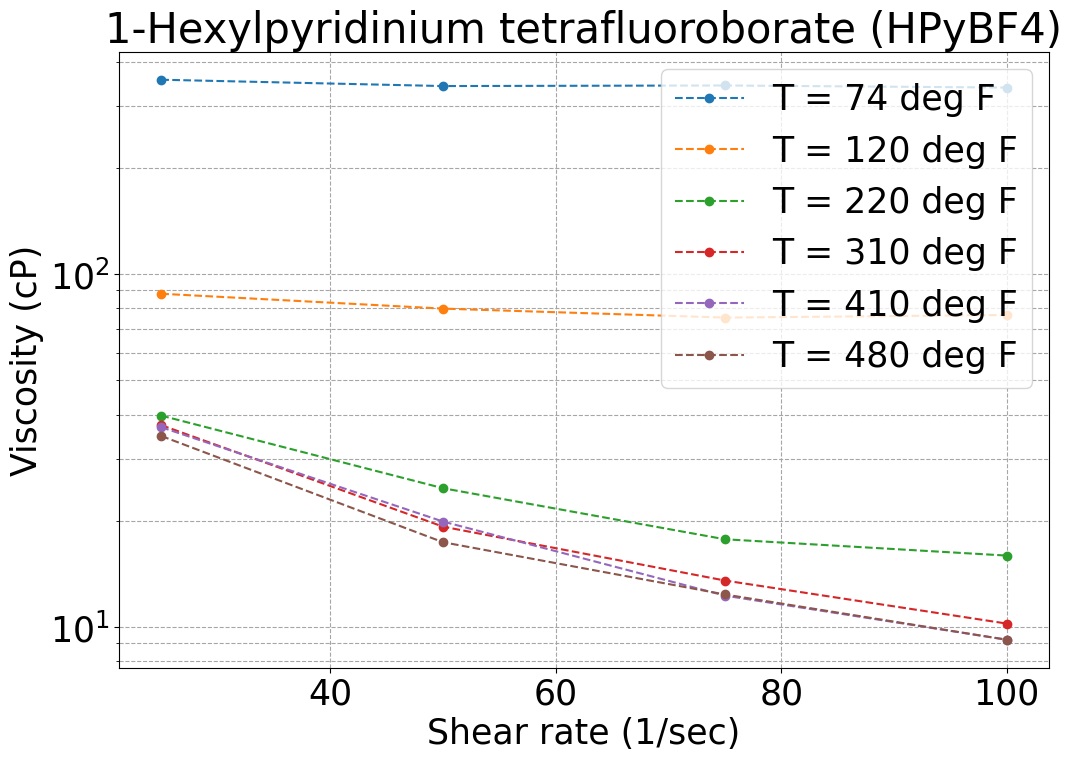

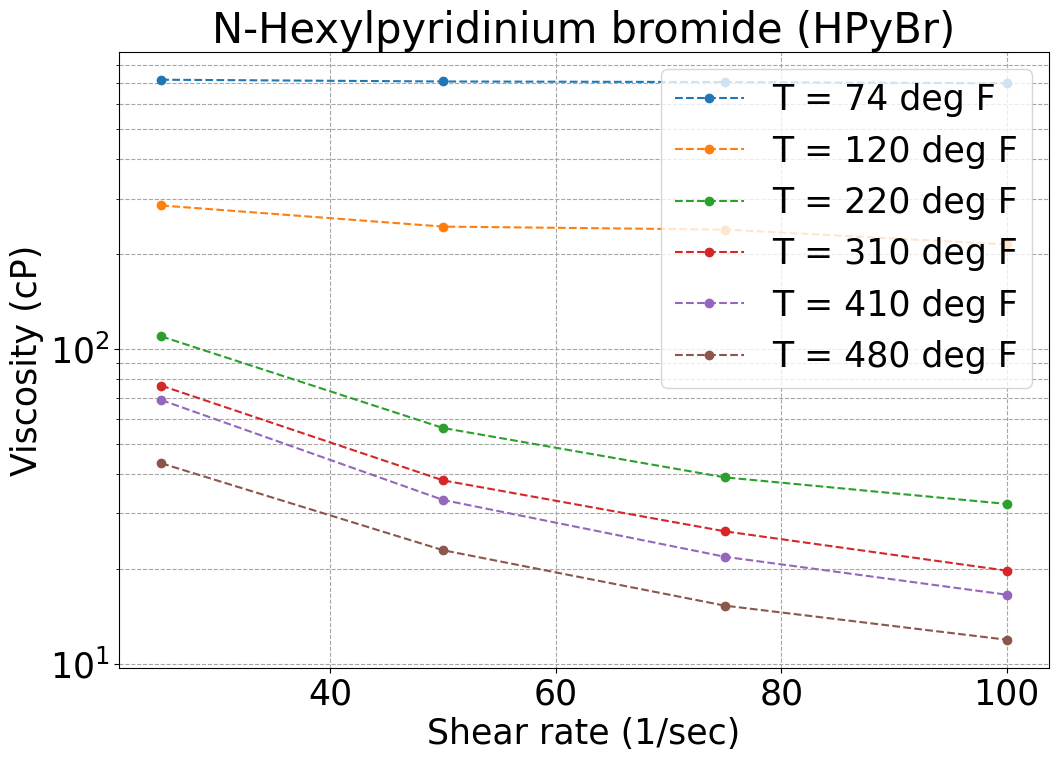

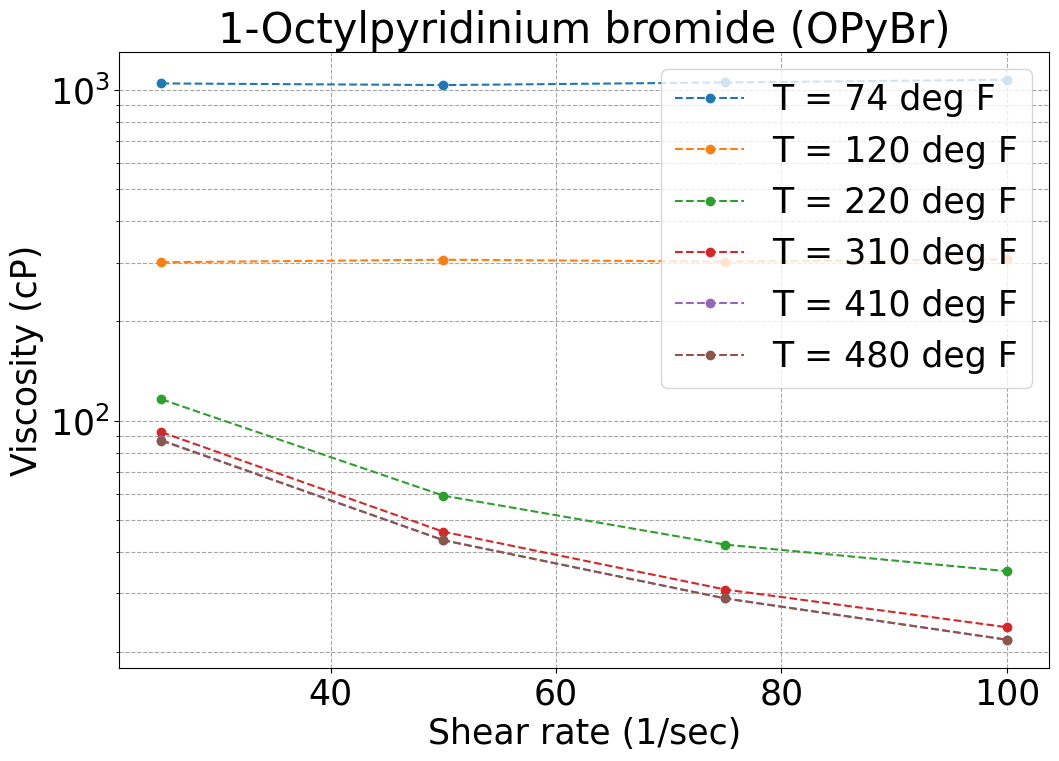

In [17]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',

    'HPyBr_CP',
    # 'HPyBr_CT',

    'OPyBr_CP',

    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'

    # 'DES117_CP'
]


for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='cP',
    legend_units='deg F',
    y_axis_log_scale=True,
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Viscosity (cP)',
    font_size=25,
    axis_font_size=25
)

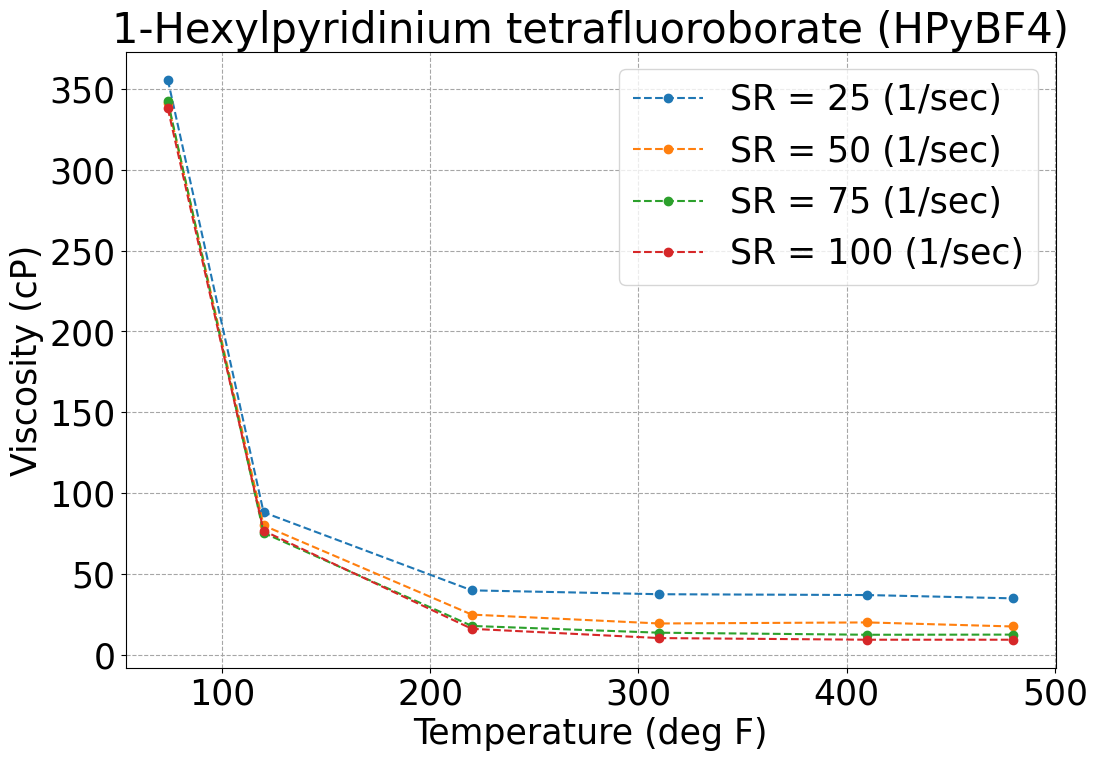

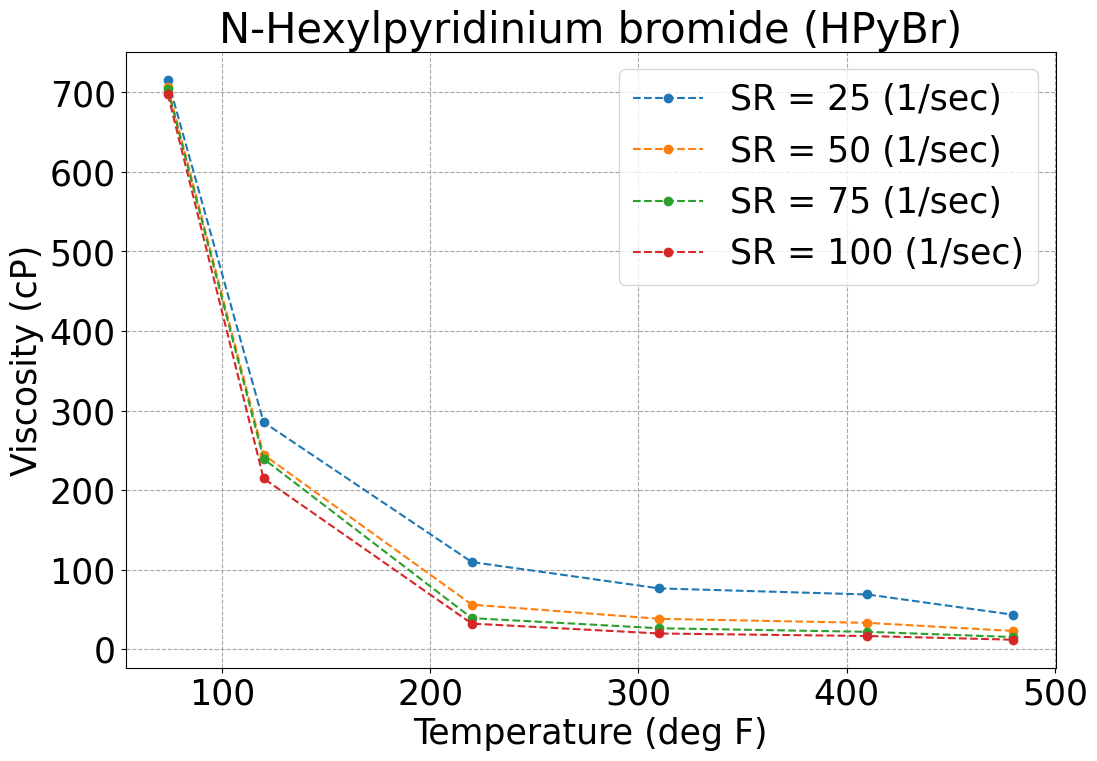

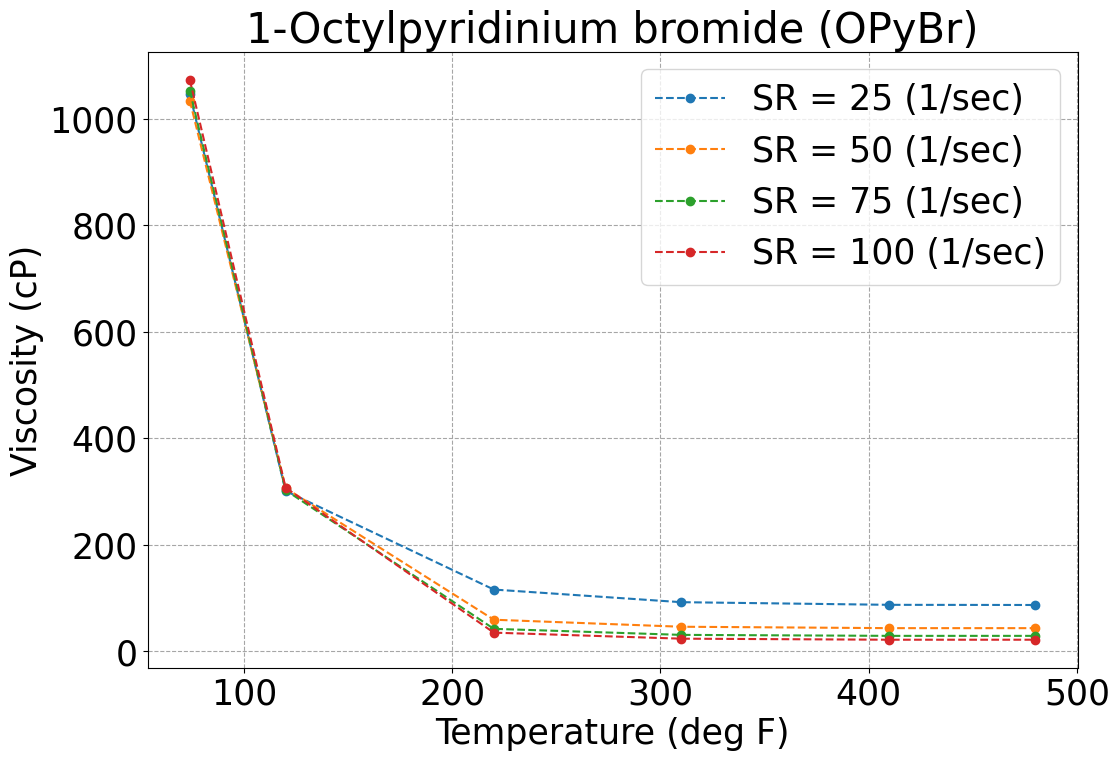

In [18]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',

    'HPyBr_CP',
    # 'HPyBr_CT',

    'OPyBr_CP',

    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'

    # 'DES117_CP'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='T',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)',
    maping_dict=mapping_dict,
    x_axis_label='Temperature (deg F)',
    y_axis_label='Viscosity (cP)',
    font_size=25,
    axis_font_size=25
)

# Constant Temperature

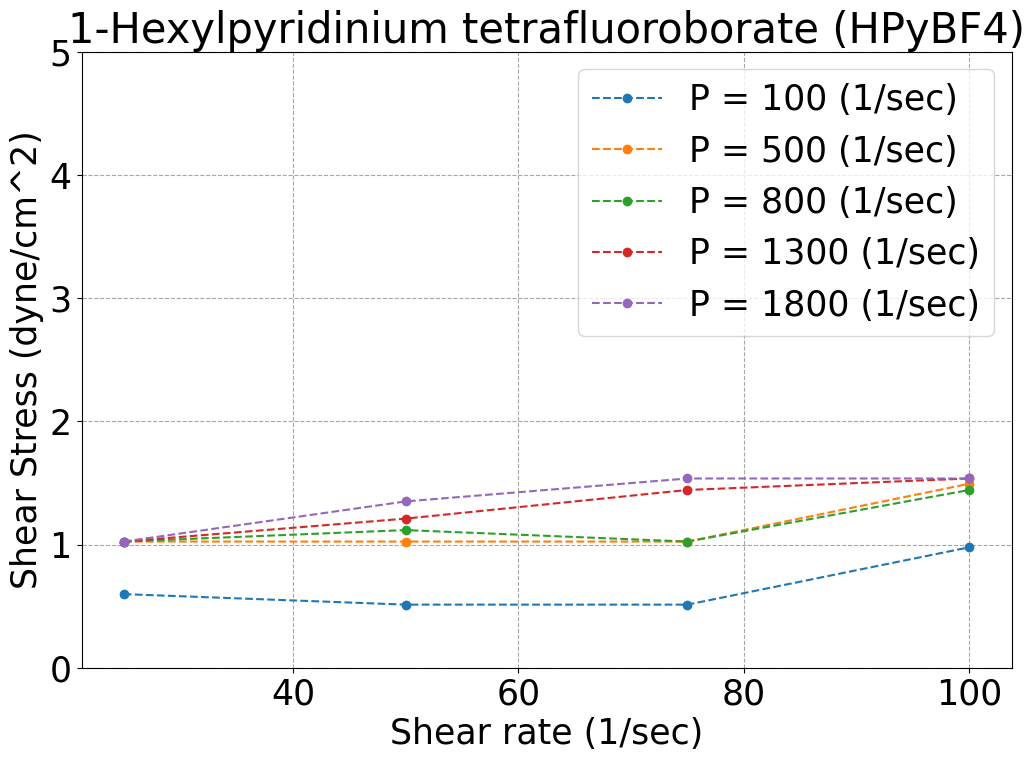

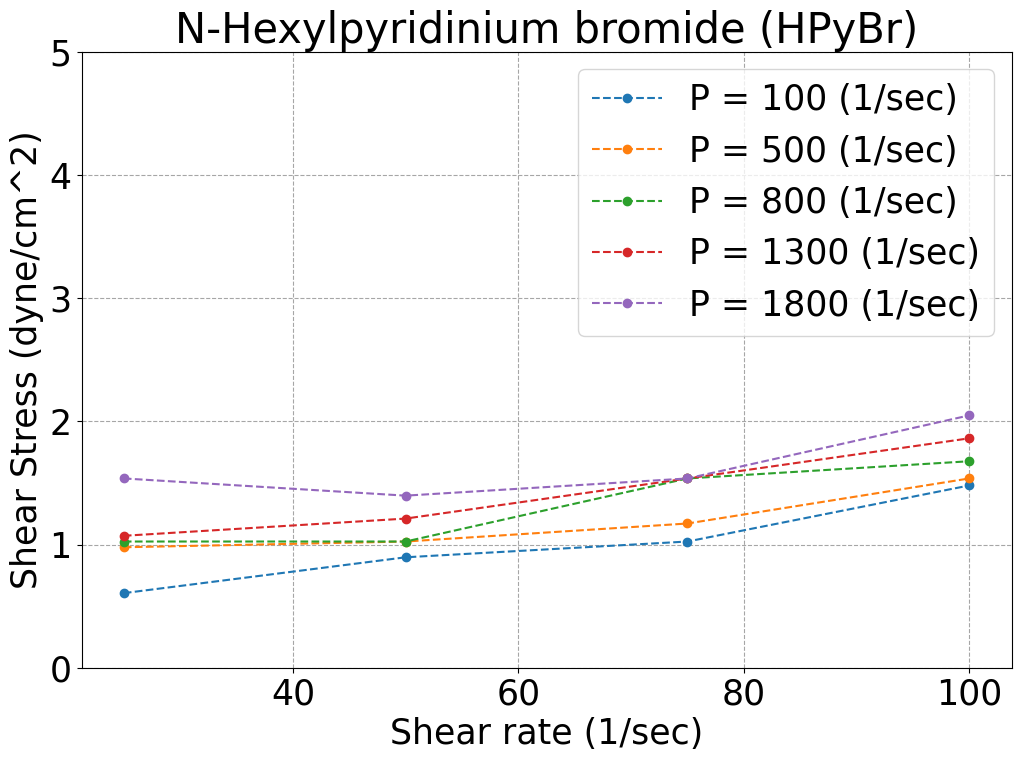

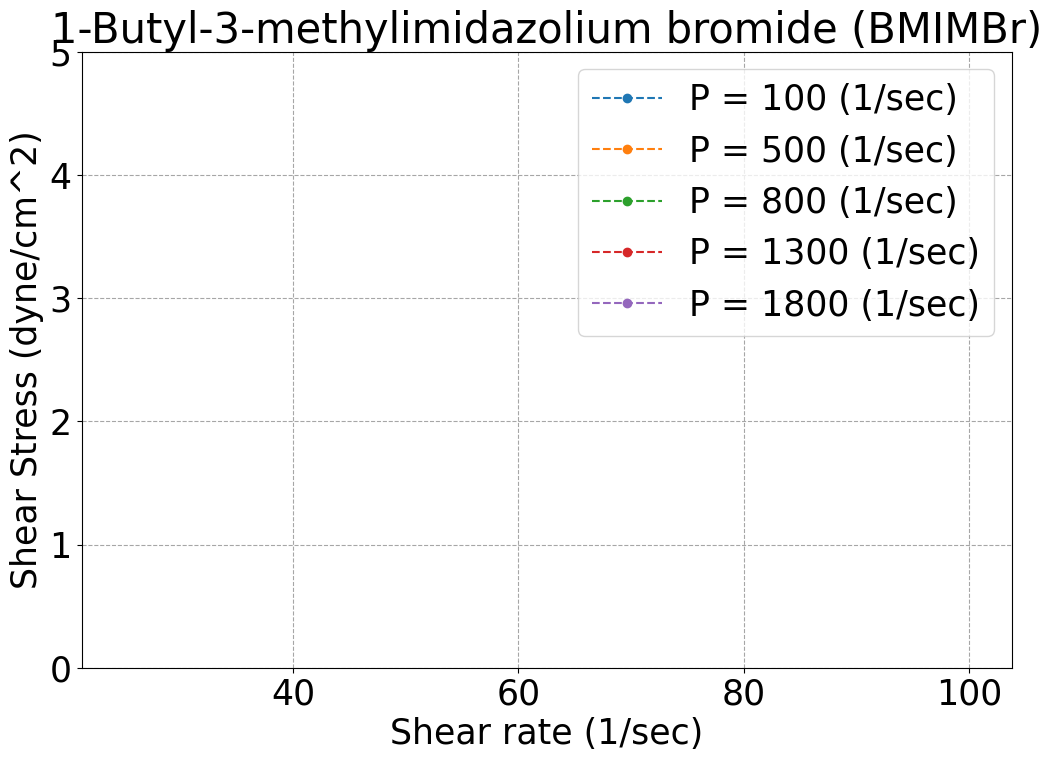

In [19]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',

    # 'HPyBr_CP',
    'HPyBr_CT',

    # 'OPyBr_CP',

    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'

    # 'DES117_CP'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='SS',
    y_axis_log_scale=False,
    legend_units='(1/sec)',
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Shear Stress (dyne/cm^2)',
    font_size=25,
    axis_font_size=25,
    y_axis_lim=(0,5)
)

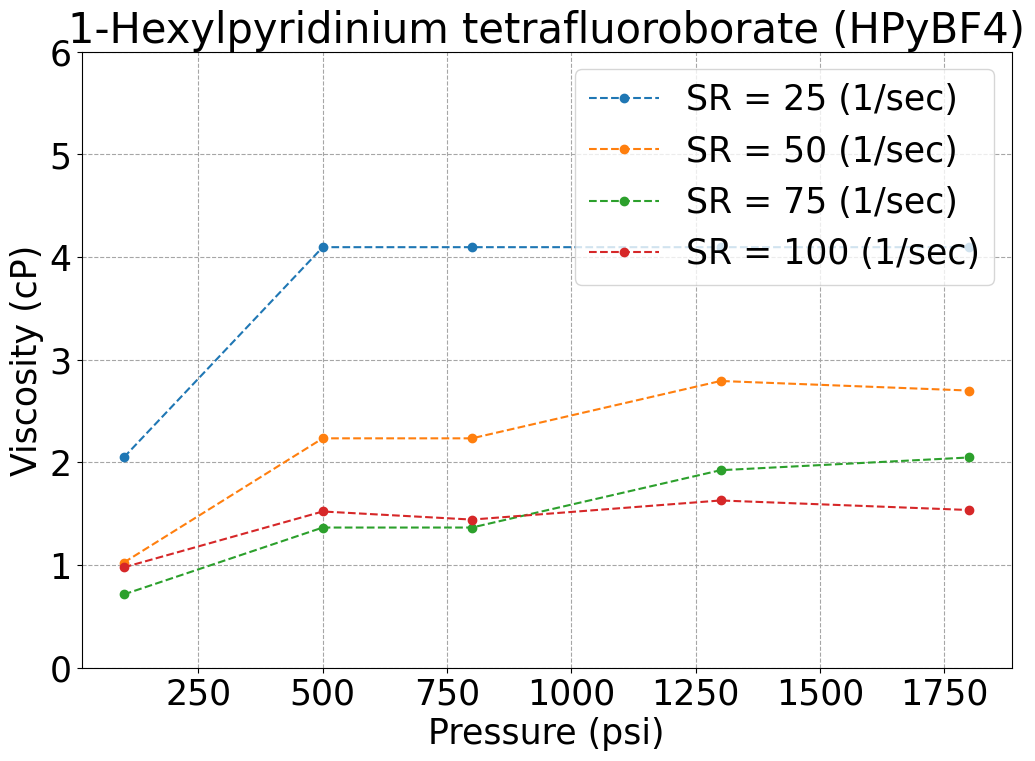

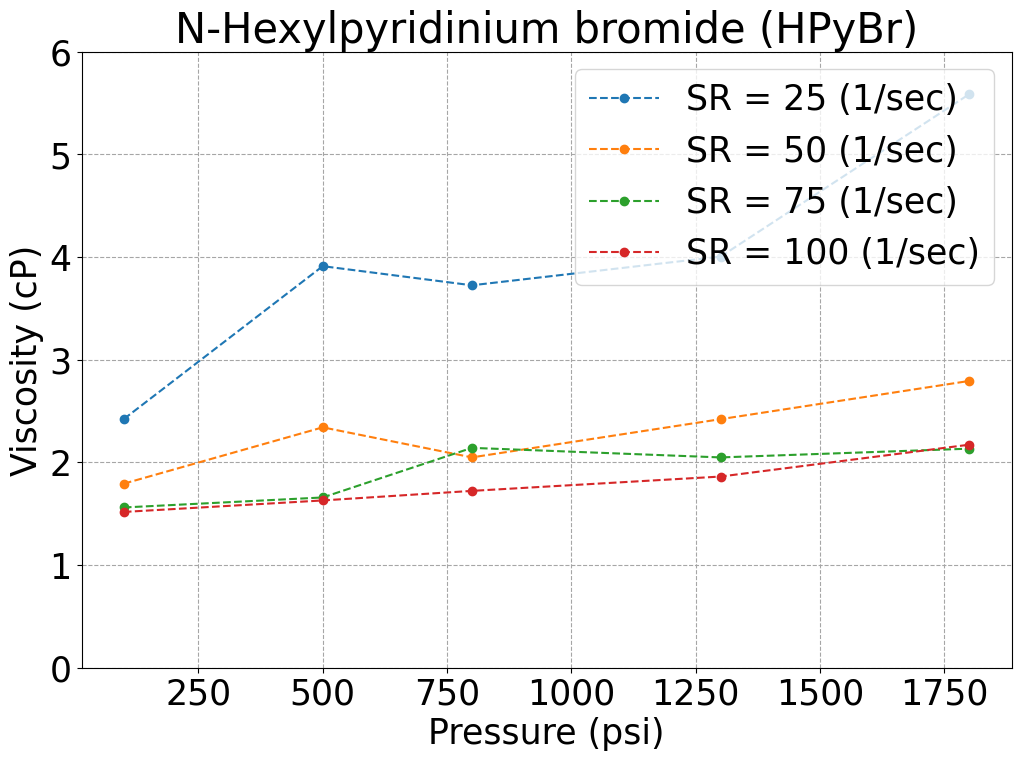

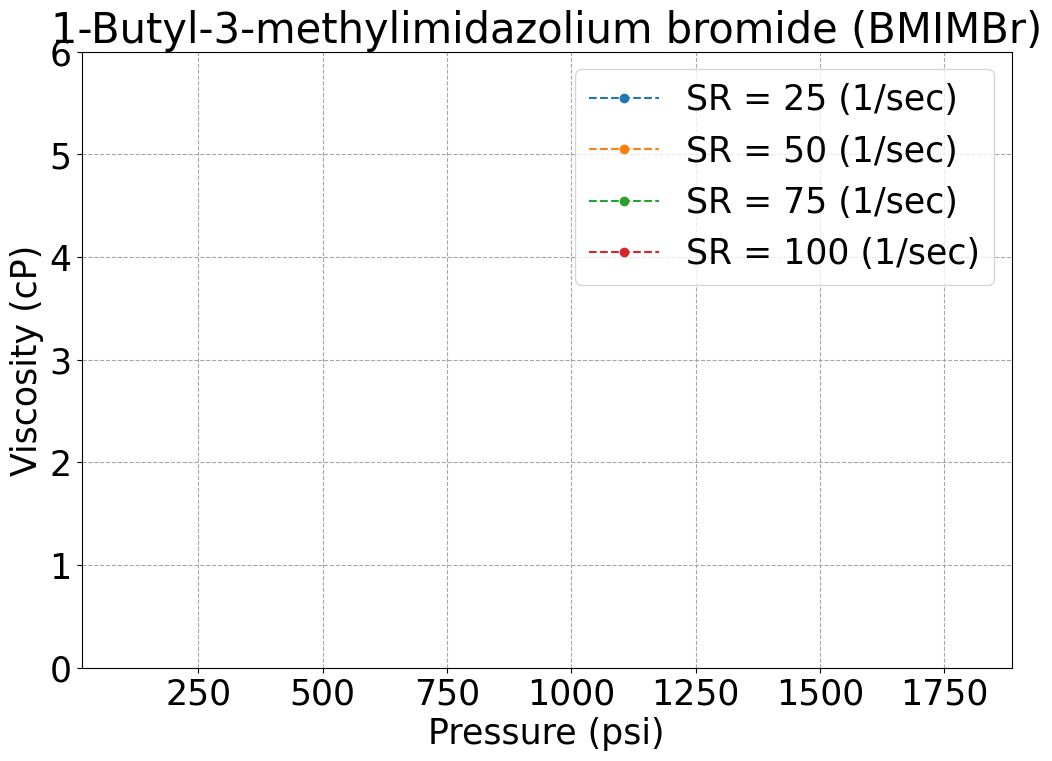

In [20]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',

    # 'HPyBr_CP',
    'HPyBr_CT',

    # 'OPyBr_CP',

    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'

    # 'DES117_CP'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='P',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)',
    maping_dict=mapping_dict,
    x_axis_label='Pressure (psi)',
    y_axis_label='Viscosity (cP)',
    font_size=25,
    axis_font_size=25,
    y_axis_lim=(0,6)
)

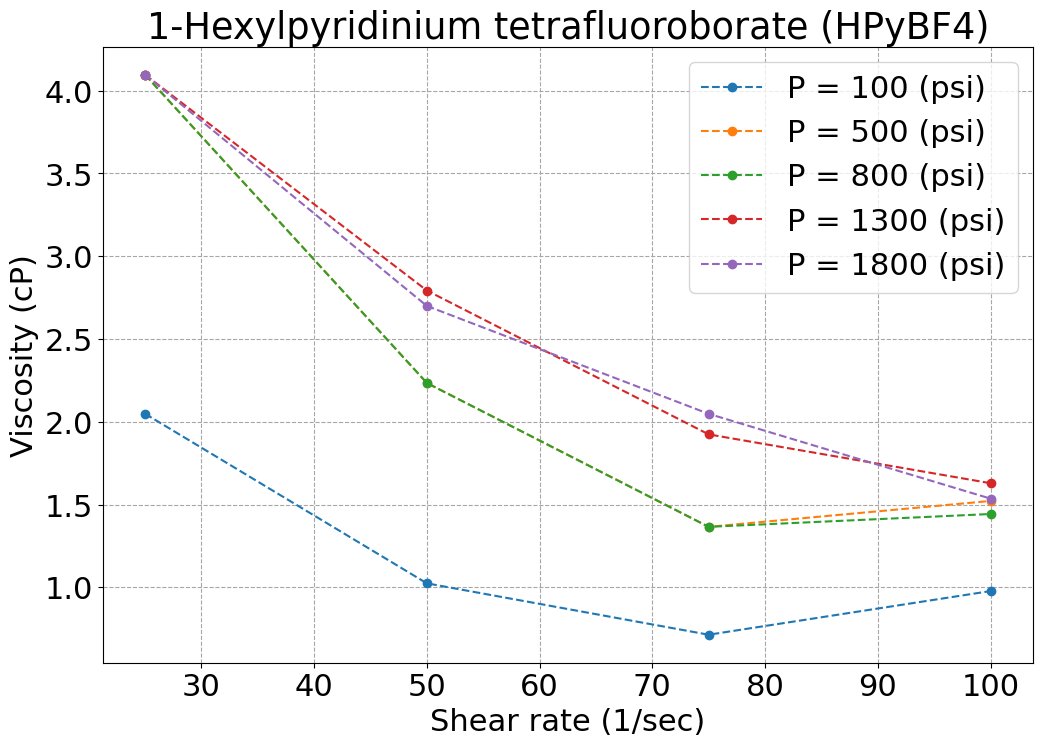

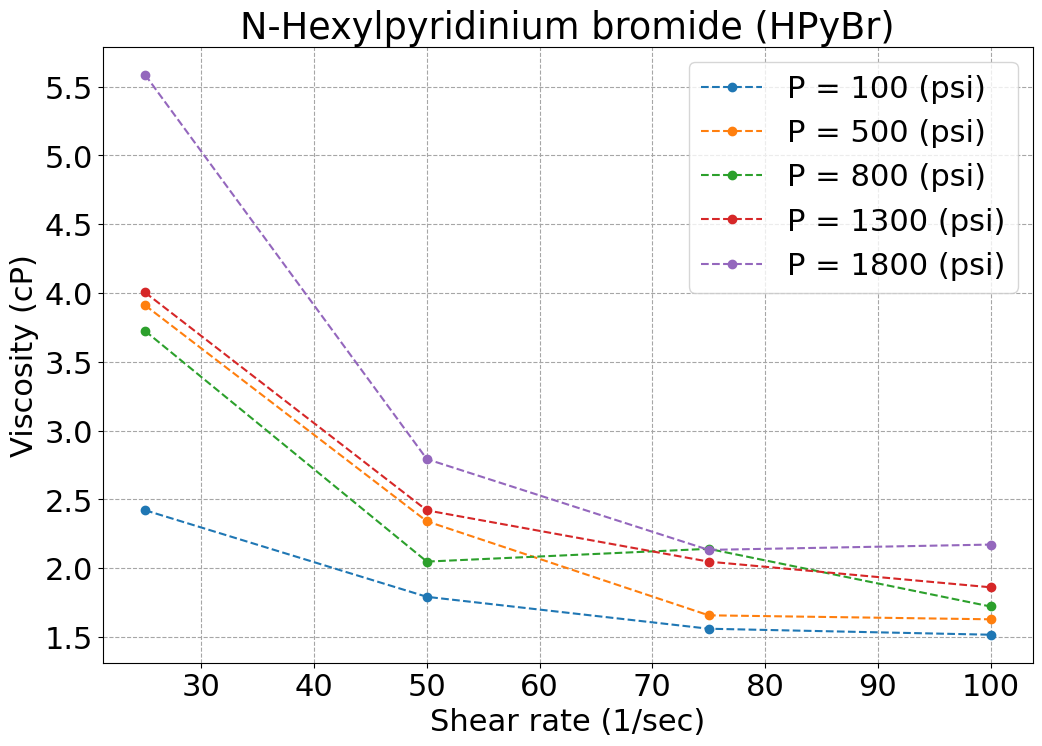

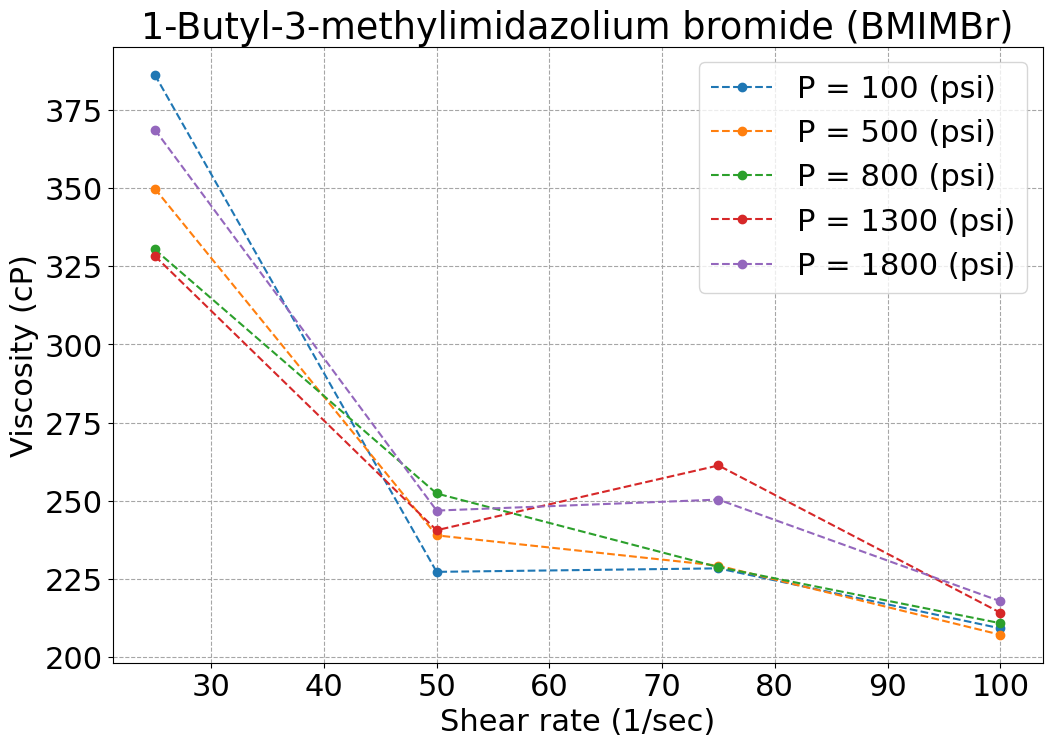

In [21]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT',
    # 'DES117_CP'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(psi)',
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Viscosity (cP)',
    font_size=22,
    axis_font_size=22
)

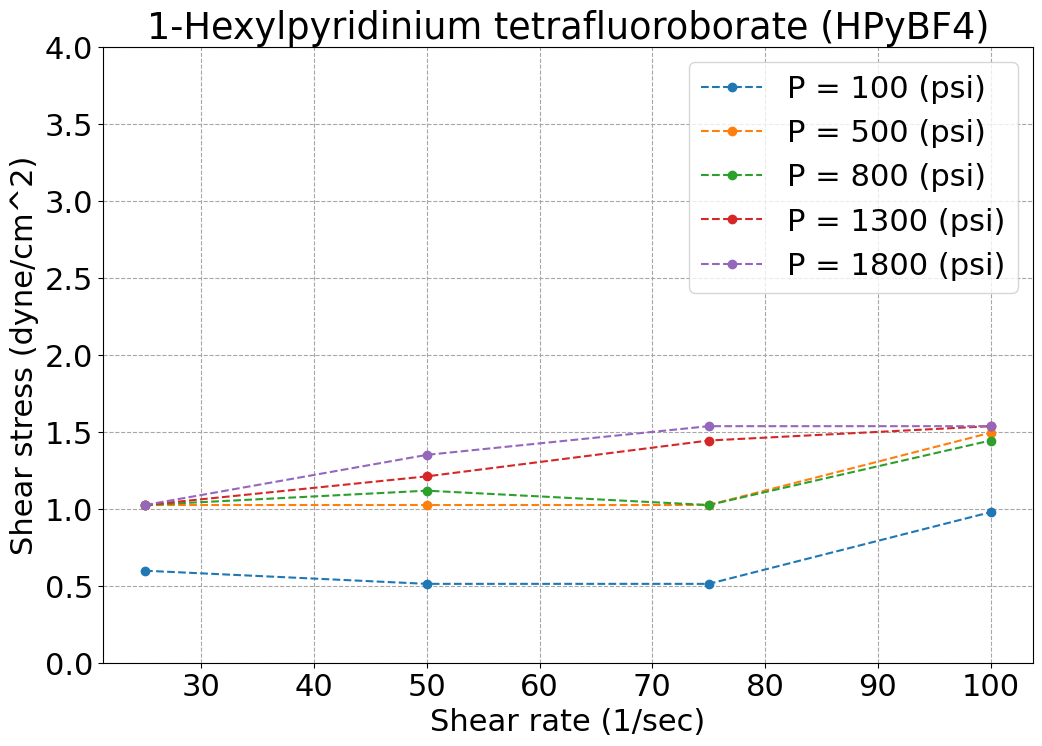

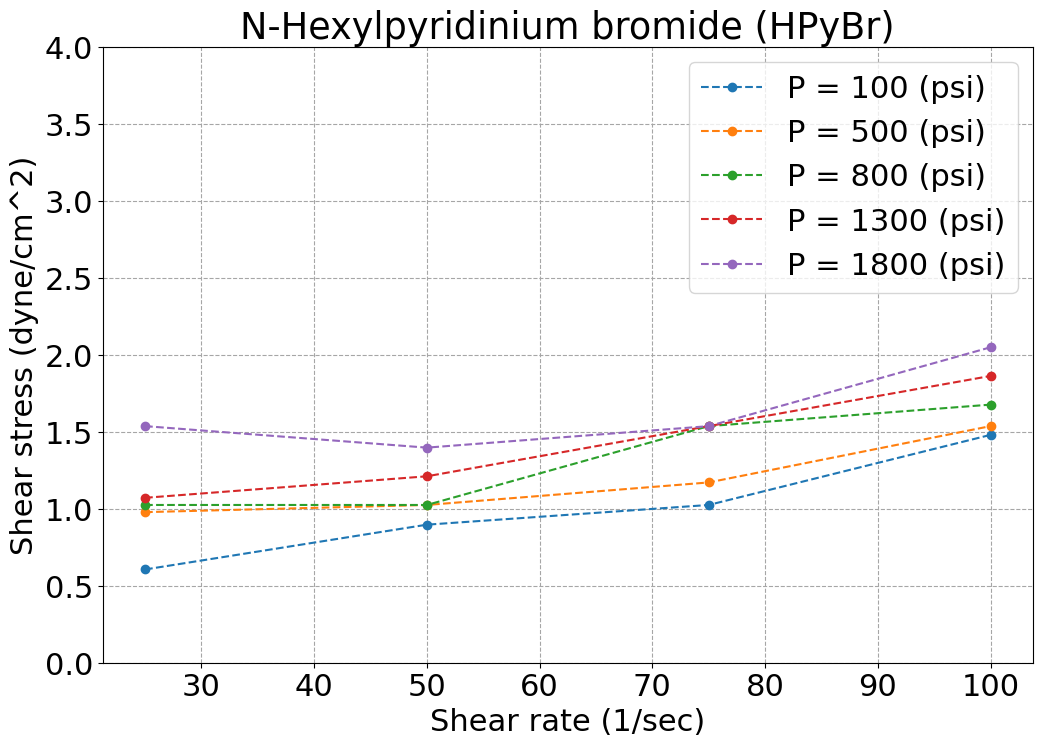

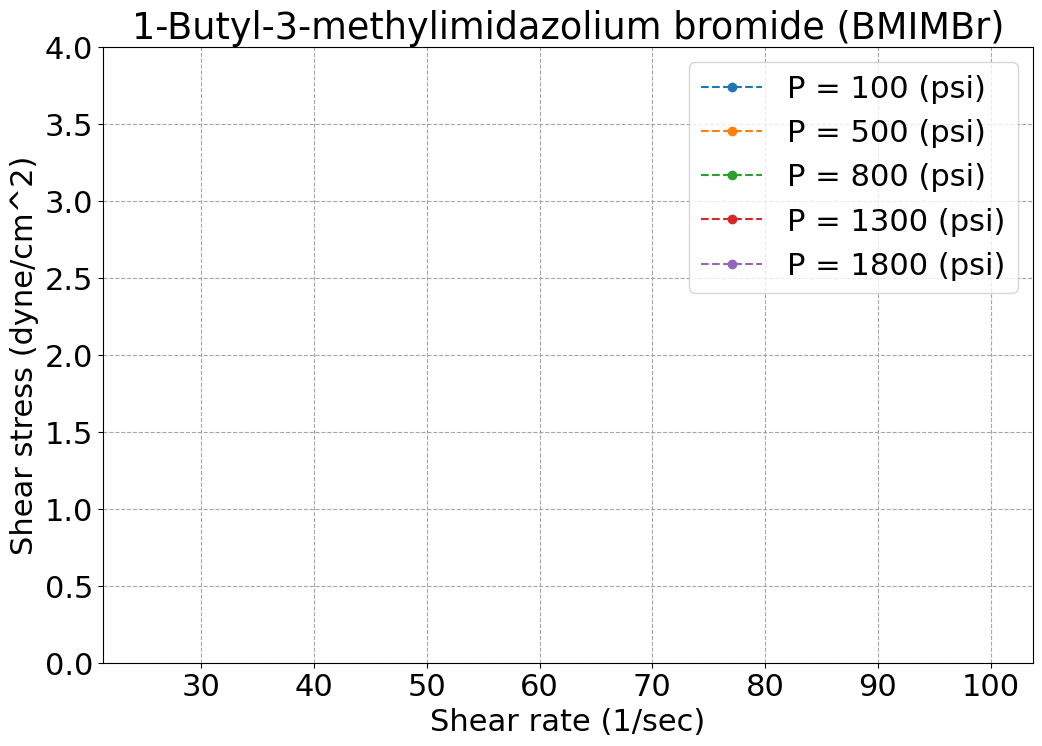

In [22]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT',
    # 'DES117_CP'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='SS',
    y_axis_log_scale=False,
    legend_units='(psi)',
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Shear stress (dyne/cm^2)',
    font_size=22,
    axis_font_size=22,
    y_axis_lim=(0,4)
)